I have worked on "Taxi-v3" environment under "Toy Text" category of OpenAI gym environments and made an Q-learning agent to learn the decision process for picking a passenger at an initial location and dropping him/her at desired location using an optimal path.

In [1]:
#importing required libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#making an environment
env = gym.make("Taxi-v3");

In [3]:
#declaring no.of episodes and steps
train_episodes = 3000
test_episodes = 100
max_steps = 100

# Creating Q and Random Agents

In [4]:
#creating Q-learning agent:
class q_agent:
    
    def __init__(self,learn_rate,epsilon,epsilon_decay,discount):
        self.learn_rate = learn_rate
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.discount = discount
        self.Q = np.zeros((env.observation_space.n,env.action_space.n))
        
    #exponential epsilon decay to allow more exploitation later
    def eps_update(self):
        self.epsilon *= self.epsilon_decay
    
    #epsilon-greedy strategy to select action
    def act(self,state):
        if np.random.uniform(0,1) < self.epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(self.Q[state,:])
        
    #update Q-table using Bellman equation
    def Q_update(self,next_state,reward):
        a = (1-self.learn_rate)*self.Q[state][action]
        b = self.learn_rate*(reward+self.discount*np.max(self.Q[next_state,:]))
        self.Q[state][action] = a+b
        
    #end training by setting epsilon=-1 so that "act" always chooses highest Q-value action
    def end_train(self):
        self.epslion = -1
        
        
bot = q_agent(0.7,1,0.99,0.618)

In [5]:
#creating random agent
class random_agent:
    
    #choosing action by random
    def act(self,state):
        return env.action_space.sample()
    
    
random = random_agent()

# Q-Agent Training

In [6]:
#initialising required lists
q_train_list = []
epsilons_list = []

In [7]:
#training the q-agent
for episode in range(train_episodes):
    
    #re-setting environment for each episode
    state,info = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        
        #choosing an action and performing it
        action = bot.act(state)
        next_state,reward,terminated,truncated,info = env.step(action)
        
        #adding the reward to total reward of episode and Q-value update
        total_reward += reward
        bot.Q_update(next_state,reward)
        
        #updating state
        state = next_state
        
        #checking if present episode is finished
        if(terminated==True or truncated==True):
            break
            
    #adding epsilon to list and updating it
    epsilons_list.append(bot.epsilon)
    bot.eps_update()
    
    #adding total reward to the list
    q_train_list.append(total_reward)    

C:\Users\Naresh Bandaru\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [8]:
#Ending training phase of q-agent
bot.end_train()

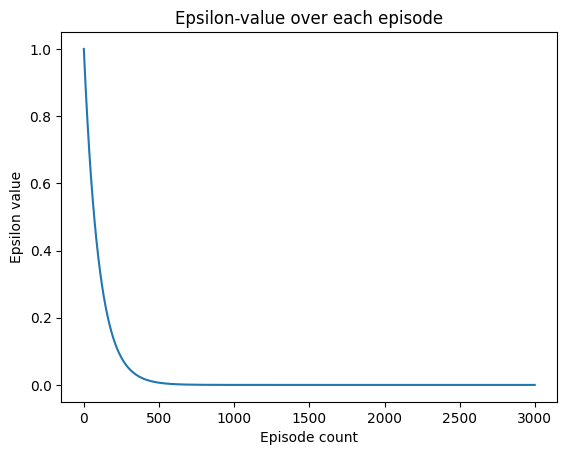

In [9]:
#plotting how epsilon value changes from episode to episode
episodes_list = range(train_episodes)
plt.plot(episodes_list,epsilons_list)
plt.xlabel('Episode count')
plt.ylabel('Epsilon value')
plt.title('Epsilon-value over each episode')
plt.show()

# Random Agent Training

In [10]:
#initialising required list
rand_train_list = []

In [11]:
#getting total rewards obtained for each episode when random agent does the job
for episode in range(train_episodes):
    
    #re-setting environment for each episode
    state,info = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        
        #choosing an action and performing it
        action = random.act(state)
        next_state,reward,terminated,truncated,info = env.step(action)
        
        #adding the reward to total reward of episode
        total_reward += reward
        
        #updating state
        state = next_state
        
        #checking if present episode is finished
        if(terminated==True or truncated==True):
            break
            
    #adding total reward to the list
    rand_train_list.append(total_reward)

# Comparison in Training Phase

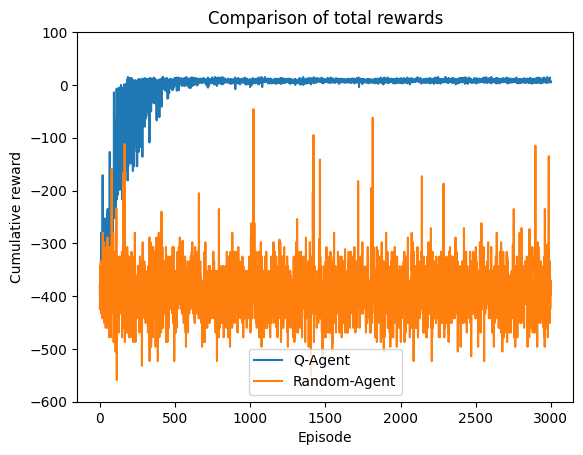

In [12]:
#plotting total rewards for each episode(to compare q-agent and random one)
plt.plot(episodes_list,q_train_list,label='Q-Agent')
plt.plot(episodes_list,rand_train_list,label='Random-Agent')
plt.ylim(-600,100)
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Comparison of total rewards')
plt.legend()
plt.show()

We can observe tha the Q-learning agent slowly learns the set of decisions to be taken for better rewards unlike the random one which shows no development.Q-learning agent achieves this by exploring and exploiting different actions and regularly updating its Q-table of state and action.

# Testing the Agents

In [13]:
#initialising required lists
q_test_list = []
rand_test_list = []

In [14]:
#Testing Q-agent
for episode in range(test_episodes):
    
    #re-setting environment for each episode
    state,info = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        #choosing an action and performing it
        action = bot.act(state)
        next_state,reward,terminated,truncated,info = env.step(action)
        
        #adding the reward to total reward of episode
        total_reward += reward
        
        #updating state
        state = next_state
        
        #checking if present episode is finished
        if(terminated==True or truncated==True):
            break
            
    #adding total reward to the list
    q_test_list.append(total_reward)

In [15]:
#testing random agent
for episode in range(test_episodes):
    
    #re-setting environment for each episode
    state,info = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        
        #choosing an action and performing it
        action = random.act(state)
        next_state,reward,terminated,truncated,info = env.step(action)
        
        #adding the reward to total reward of episode
        total_reward += reward
        
        #updating state
        state = next_state
        
        #checking if present episode is finished
        if(terminated==True or truncated==True):
            break
            
    #adding total reward to the list
    rand_test_list.append(total_reward)

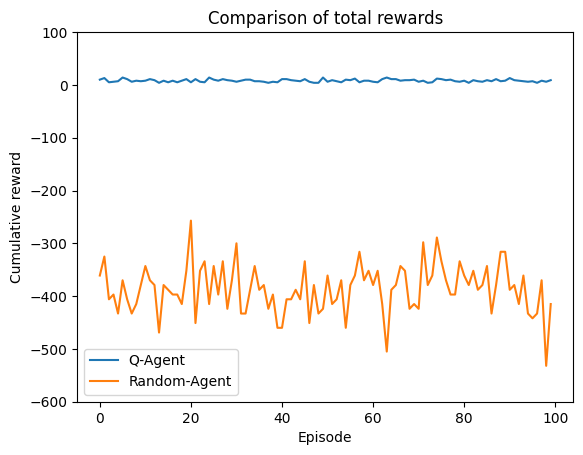

In [16]:
#plotting total rewards for each episode(to compare q-agent and random one)
x = range(test_episodes)
plt.plot(x,q_test_list,label='Q-Agent')
plt.plot(x,rand_test_list,label='Random-Agent')
plt.ylim(-600,100)
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Comparison of total rewards')
plt.legend()
plt.show()

After training, Q-learning agent consistently performs better than Random one.Also,Q-learning agent gets positive cumulative rewards in each episode.

In [17]:
#Closing our environment
env.close()

# Rendering Trained model of Q-Agent

In [18]:
#creating new environment for render mode
env = gym.make("Taxi-v3",render_mode="human")
no_runs = 10

In [19]:
#Running the trained Q-agent in a rendered environment
for run in range(no_runs):
    
    #re-setting the environment for each run
    state,info = env.reset()
    score = 0
    print("***********************************")
    print("Run number:",run+1)
    
    #Starting steps to be taken and breaking out if goal is reached
    for step in range(max_steps):
        action = bot.act(state)
        next_state,reward,terminated,truncated,info = env.step(action)
        score += reward
        state = next_state
        if(terminated==True):
            print("Successfully dropped passenger at desired location")
            break;
    print("Score for the run:",score)
#closing the environment
env.close()

***********************************
Run number: 1
Successfully dropped passenger at desired location
Score for the run: 10
***********************************
Run number: 2
Successfully dropped passenger at desired location
Score for the run: 4
***********************************
Run number: 3
Successfully dropped passenger at desired location
Score for the run: 5
***********************************
Run number: 4
Successfully dropped passenger at desired location
Score for the run: 7
***********************************
Run number: 5
Successfully dropped passenger at desired location
Score for the run: 6
***********************************
Run number: 6
Successfully dropped passenger at desired location
Score for the run: 6
***********************************
Run number: 7
Successfully dropped passenger at desired location
Score for the run: 10
***********************************
Run number: 8
Successfully dropped passenger at desired location
Score for the run: 8
**********************